<a href="https://colab.research.google.com/github/Wangprai/Sarary-growth-in-data-science-career/blob/main/salary_growth_in_data_science_careers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libaries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Dataframe**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS file/ds_salaries.csv')
df.head(10).style.set_properties(**{'text-align': 'center'})

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


# **EDA part**

## **Detail of data**




In [ ]:
print("Data Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nShape of data")
print(df.shape)

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None

Summary Statistics:
         work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880  

## **Visualization**

### กราฟที่แสดงการกระจายตัวของเงินเดือน





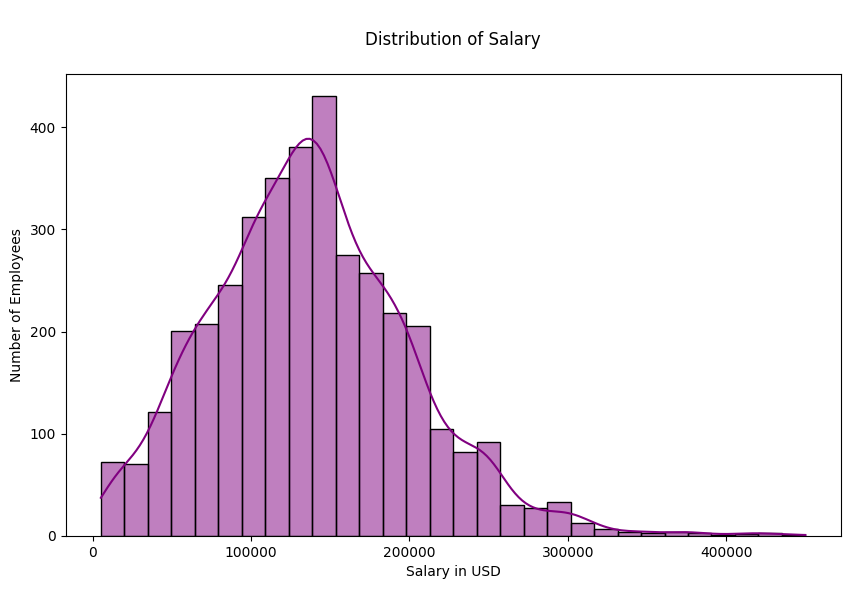

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True, bins=30, color='purple')
plt.title('\nDistribution of Salary\n')
plt.xlabel('Salary in USD')
plt.ylabel('Number of Employees')
plt.show()

เงินเดือนส่วนใหญ่จะตกอยู่ในช่วง 100,000 - 150,000 ดอลลาร์สหรัฐฯ

### แนวโน้มในแต่ละช่วงปี

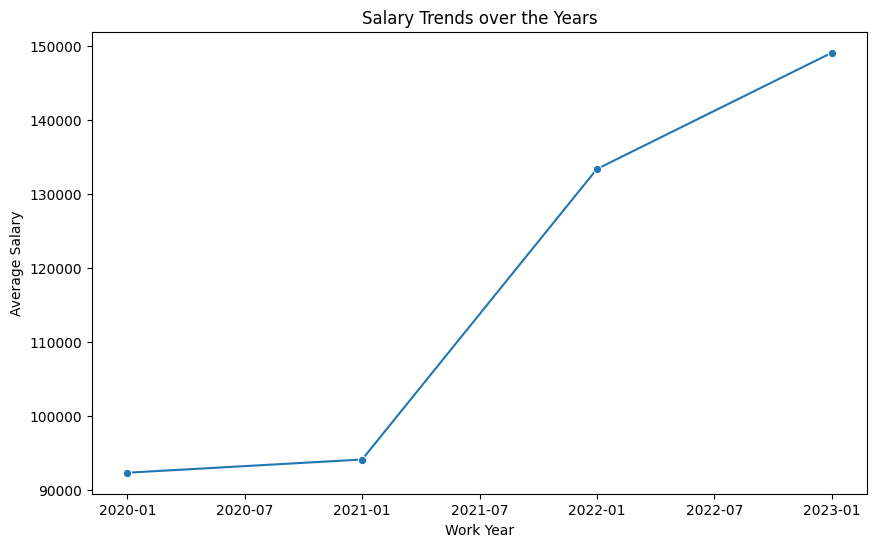

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='work_year', y='salary_in_usd', data=df, estimator='mean', errorbar=None, marker='o')
plt.title('Salary Trends over the Years')
plt.xlabel('Work Year')
plt.ylabel('Average Salary')
x = [2020.0, 2020.5 ,2021.0, 2021.5, 2022.0, 2022.5, 2023.0]
labels_year2date=["2020-01","2020-07","2021-01","2021-07","2022-01","2022-07","2023-01"]
plt.xticks(x, labels=labels_year2date)
plt.show()

เงินเดือนจะมีแนวโน้มเพิ่มขั้นในทุกๆ ปี

### ความสัมพันธ์ระหว่างเงินเดือนกับประสบการณ์

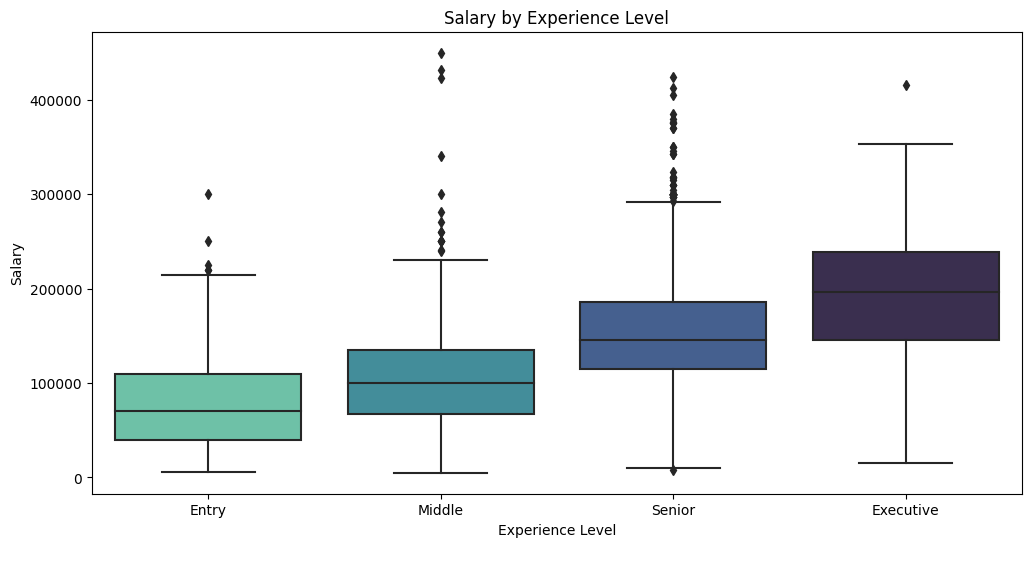

In [ ]:
  plt.figure(figsize=(12, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', order=['EN','MI','SE','EX'], data=df ,palette='mako_r')
plt.title('Salary by Experience Level')
plt.xlabel('Experience Level\n')
plt.ylabel('Salary')
x_labels_order = ['Entry', 'Middle', 'Senior', 'Executive']
plt.xticks(ticks=[0, 1, 2, 3], labels=x_labels_order)
plt.show()

จะได้ว่า เงินเดือนจะขึ้นตรงกับประสบการณ์

### ประเภทการจ้างงาน จะส่งผลต่อเงินเดือนที่ได้รับ





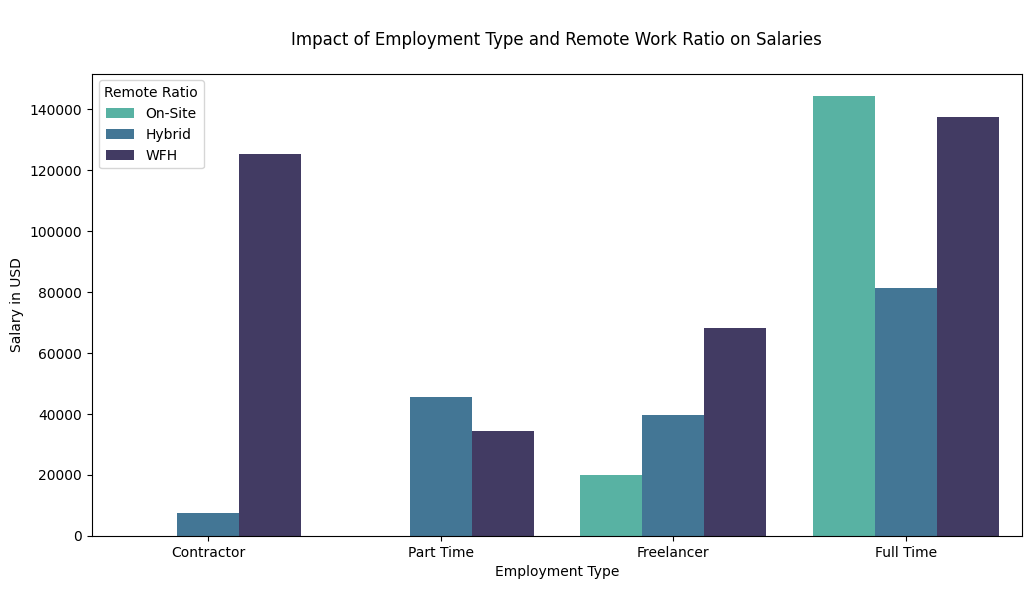

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='employment_type', y='salary_in_usd', hue='remote_ratio', order=['CT','PT','FL','FT'], data=df, errorbar=None, palette='mako_r')
plt.title('\nImpact of Employment Type and Remote Work Ratio on Salaries\n')
plt.xlabel('Employment Type\n')
plt.ylabel('Salary in USD')
x_labels_order_et = ['Contractor', 'Part Time', 'Freelancer', 'Full Time']
legend_labels= ['On-Site','Hybrid','WFH']
plt.legend(labels = legend_labels, title='Remote Ratio', loc='upper left')
plt.xticks(ticks=[0, 1, 2, 3], labels=x_labels_order_et)
plt.show()

จะเห็นได้ว่า รูปแบบการทำงานแบบ Full Time จะได้รับเงินเดือนมากที่สุด แต่ก็จะมี การทำงานรูปแบบ WFH ของ Contractor ก็จะมีเงินเดือนที่ค่อนข้างสูง

### 10 อาชีพที่มีเงินเดือนสูงสุดและต่ำสุด

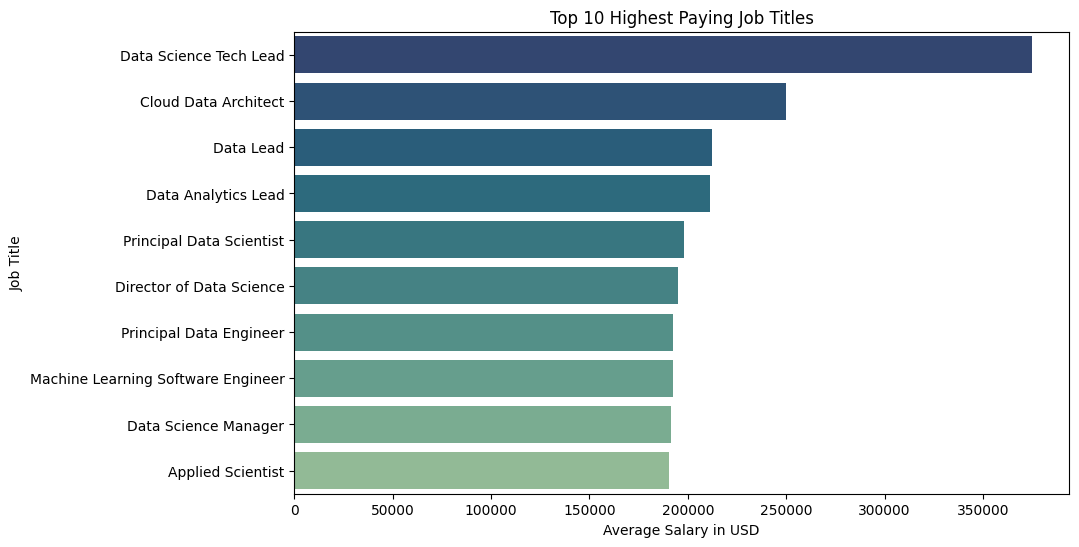

In [ ]:
highest_paying_jobs = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=highest_paying_jobs.values, y=highest_paying_jobs.index, palette='crest_r')
plt.title('Top 10 Highest Paying Job Titles')
plt.xlabel('Average Salary in USD')
plt.ylabel('Job Title')
plt.show()

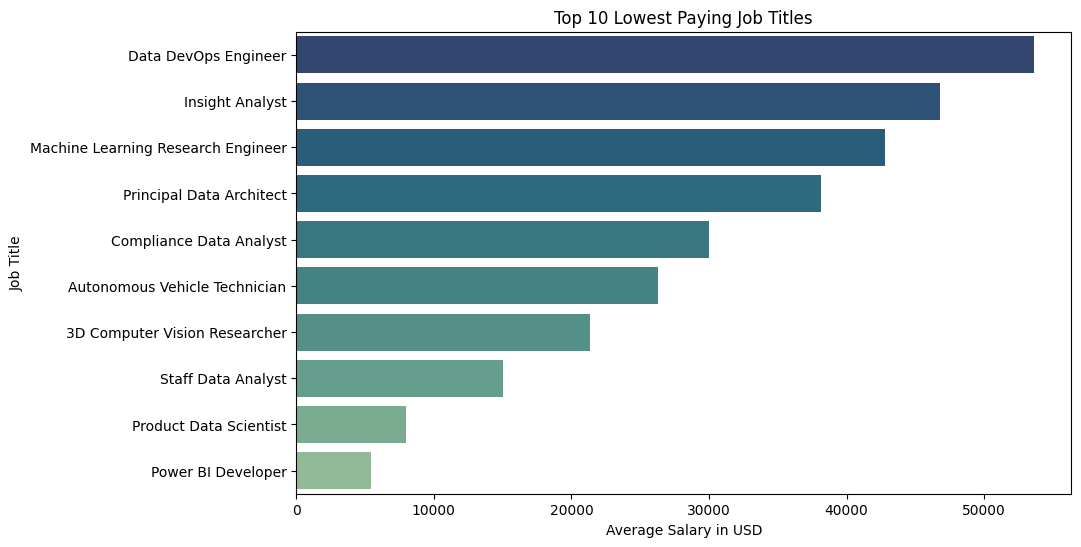

In [ ]:
lowest_paying_jobs = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).tail(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=lowest_paying_jobs.values, y=lowest_paying_jobs.index, palette='crest_r')
plt.title('Top 10 Lowest Paying Job Titles')
plt.xlabel('Average Salary in USD')
plt.ylabel('Job Title')
plt.show()

จะเห็นได้ว่า อาชีพที่ได้รับเงินเดือนมากที่สุดจะเป็นอาชีพ Data Science Tect Read และอาชีพที่ได้รับเงินเดือนน้อยที่สุดจะเป็น Power BI Developer

### 10 อาขีพที่ได้รับความนิยมมากที่สุด

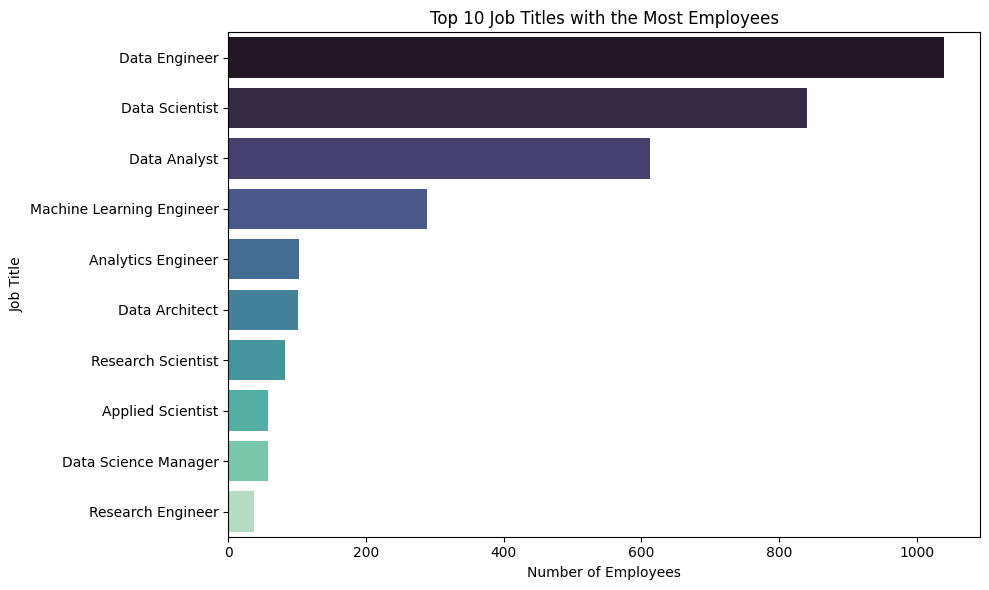

In [ ]:
top_10_job_titles = df['job_title'].value_counts().nlargest(10).index
top_10_job_titles_df = df[df['job_title'].isin(top_10_job_titles)]
employee_count_by_job = top_10_job_titles_df['job_title'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=employee_count_by_job.values, y=employee_count_by_job.index, palette='mako')
plt.title('Top 10 Job Titles with the Most Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

จะเห็นว่า ส่วนใหญ่จะทำงานในตำแหน่ง Data Engineer , Data Scienctist , Data Analyst และ Machine Learning Engineer

### แนวโน้มเงินเดือนในช่วงหลายปีที่ผ่านมาของตำแหน่งงาน 4 อันดับแรกที่มีพนักงานมากที่สุด

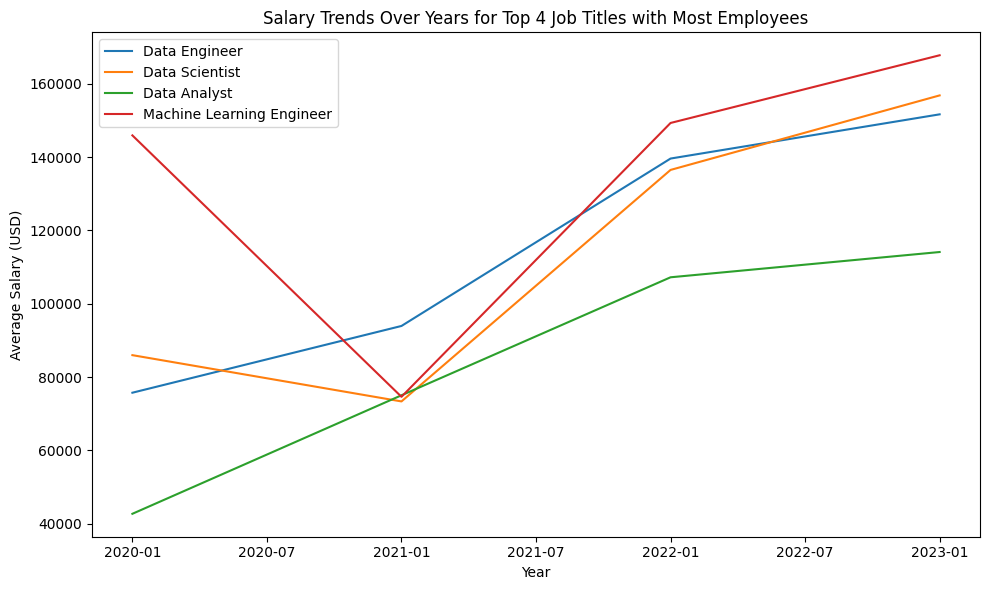

In [ ]:
top_4_job_titles = df['job_title'].value_counts().nlargest(4).index
top_4_job_titles_df = df[df['job_title'].isin(top_4_job_titles)]
average_salary_by_job_and_year = top_4_job_titles_df.groupby(['job_title', 'work_year'])['salary_in_usd'].mean().reset_index()
plt.figure(figsize=(10, 6))
for job_title in top_4_job_titles:
    job_data = average_salary_by_job_and_year[average_salary_by_job_and_year['job_title'] == job_title]
    plt.plot(job_data['work_year'], job_data['salary_in_usd'], label=job_title)

plt.title('Salary Trends Over Years for Top 4 Job Titles with Most Employees')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
x = [2020.0, 2020.5 ,2021.0, 2021.5, 2022.0, 2022.5, 2023.0]
labels_year2date=["2020-01","2020-07","2021-01","2021-07","2022-01","2022-07","2023-01"]
plt.xticks(x, labels=labels_year2date)
plt.legend()
plt.tight_layout()
plt.show()

จะเห็นได้ว่า จากกราฟเงินเดือนของ Machine Learning Engineer ลดลงจนถึงปี 2021 อย่างไรก็ตาม ในปี 2021 ได้ปรับตัวเข้ากับตลาดและเริ่มสูงขึ้น

### แนวโน้มเงินเดือนในช่วงหลายปีที่ผ่านมาตามระดับประสบการณ์

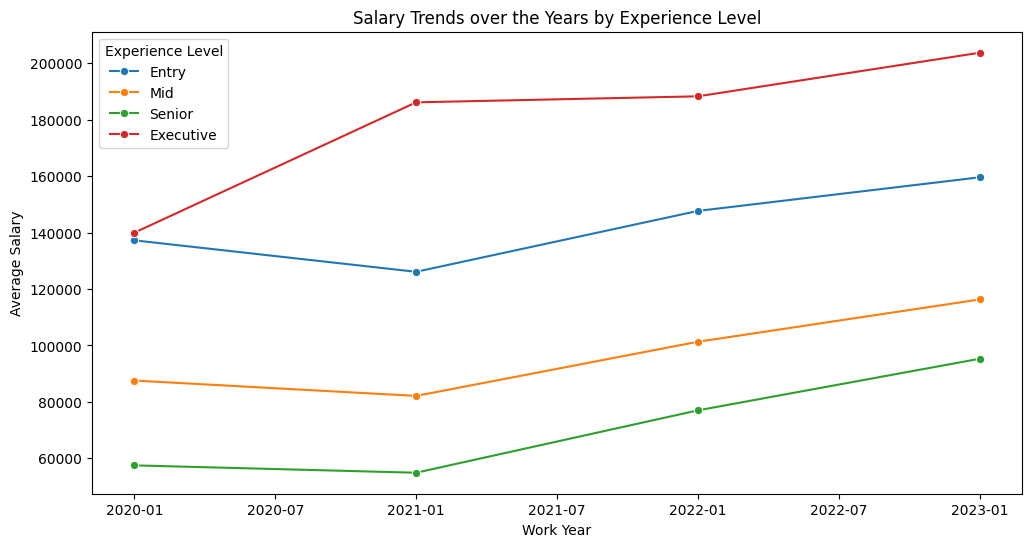

In [ ]:
legend_labels_xp = ['Entry','Mid','Senior','Executive']
plt.figure(figsize=(12, 6))
sns.lineplot(x='work_year', y='salary_in_usd', hue='experience_level', data=df, estimator='mean', errorbar=None, marker='o')
plt.title('Salary Trends over the Years by Experience Level')
x = [2020.0, 2020.5 ,2021.0, 2021.5, 2022.0, 2022.5, 2023.0]
labels_year2date=["2020-01","2020-07","2021-01","2021-07","2022-01","2022-07","2023-01"]
plt.xticks(x, labels=labels_year2date)
plt.xlabel('Work Year')
plt.ylabel('Average Salary')
plt.legend(labels = legend_labels_xp, title='Experience Level', loc='upper left')
plt.show()

ในปี 2020 ถึง 2021 เงินเดือนของ Entry Mid และ Senior มีแนวโน้มลดลง
แต่ตั้งแต่ปี 2021 เป็นต้นไป เงินเดือนได้เปลี่ยนไปสู่แนวโน้มที่เพิ่มขึ้น  ในทางกลับกัน เงินเดือนของ Executive มีแนวโน้มเพิ่มขึ้นอย่างมากในช่วงปี 2020-2021 ซึ่งแตกต่างจากระดับประสบการณ์อื่นๆ



### แนวโน้มเงินเดือนในช่วงหลายปีที่ผ่านมาตามประเภทการจ้างงาน

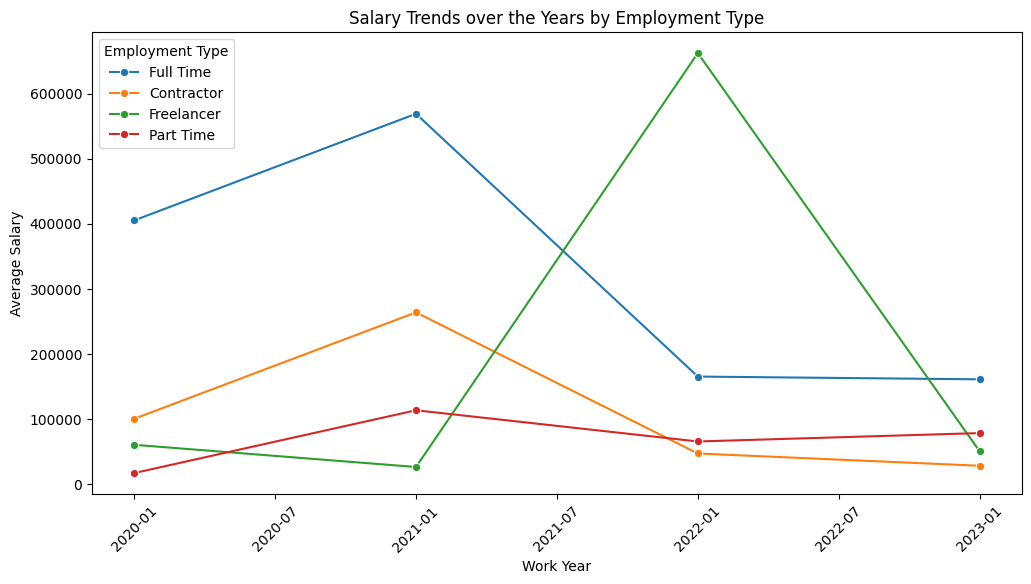

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='work_year', y='salary', hue='employment_type', data=df, estimator='mean', errorbar=None, marker='o')
plt.title('Salary Trends over the Years by Employment Type')
legend_labels_et = ['Full Time', 'Contractor', 'Freelancer', 'Part Time']
x = [2020.0, 2020.5 ,2021.0, 2021.5, 2022.0, 2022.5, 2023.0]
labels_year2date=["2020-01","2020-07","2021-01","2021-07","2022-01","2022-07","2023-01"]
plt.xticks(x, labels=labels_year2date, rotation=45)
plt.xlabel('Work Year')
plt.ylabel('Average Salary')
plt.legend(labels = legend_labels_et, title='Employment Type', loc='upper left')
plt.show()

ในปี 2021-2022 แนวโน้มเงินเดือนของ full-time contractor และ part-time ลดลงอย่างมาก และในช่วงเวลาเดียวกัน แนวโน้มเงินเดือนของ freelance เพิ่มขึ้นอย่างเห็นได้ชัด

# **Modeling**

### **แปลง Catalogical ให้เป็นตัวเลข**

In [ ]:
df_copy = df.copy()
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df_copy['employment_type'] = label_encoder.fit_transform(df_copy['employment_type'])
df_copy['employment_type'].unique()

array([2, 0, 1, 3])

In [ ]:
df_copy['experience_level'] = label_encoder.fit_transform(df_copy['experience_level'])
df_copy['experience_level'].unique()

array([3, 2, 0, 1])

In [ ]:
df_copy['job_title'] = label_encoder.fit_transform(df_copy['job_title'])
df_copy['job_title'].unique()

array([84, 66, 47,  8, 25, 38, 88,  4, 18, 69, 50, 33, 23, 41, 22, 31,  6,
        1, 89, 29, 17,  5, 91, 55, 32, 58, 45, 37, 73, 16, 49, 62, 13, 53,
       74, 67,  3,  9,  7, 64, 21, 57, 34, 90,  2, 40, 14, 44, 52, 11, 42,
       30, 70, 12, 59, 61, 51, 75, 15, 86, 24, 10, 78, 28, 35, 43, 72, 79,
       76, 68,  0, 85, 27, 26, 36, 46, 48, 20, 39, 77, 80, 87, 82, 71, 65,
       54, 19, 63, 60, 81, 83, 92, 56])

In [ ]:
df_copy['salary_currency'] = label_encoder.fit_transform(df_copy['salary_currency'])
df_copy['salary_currency'].unique()

array([ 7, 19, 12,  9,  3,  8,  0, 16,  2, 11,  1, 17, 15, 10,  5,  6, 13,
       14, 18,  4])

In [ ]:
df_copy['employee_residence'] = label_encoder.fit_transform(df_copy['employee_residence'])
df_copy['employee_residence'].unique()

array([26, 75, 11, 20, 29, 56, 39, 32, 63, 57, 13, 12, 28,  5, 27, 74, 37,
       38, 30,  4, 16, 68, 67, 69, 54, 76, 10, 71, 34, 61, 46, 77, 18,  2,
        1,  6, 45, 31, 52, 49, 64, 60, 42, 50, 47,  7,  3, 41, 35, 70, 15,
       19, 17, 73, 14, 62, 21,  9, 59, 22, 25, 36,  0, 55, 44, 24, 33, 72,
       66, 23, 40,  8, 43, 65, 58, 51, 48, 53])

In [ ]:
df_copy['remote_ratio'] = label_encoder.fit_transform(df_copy['remote_ratio'])
df_copy['remote_ratio'].unique()

array([2, 0, 1])

In [ ]:
df_copy['company_location'] = label_encoder.fit_transform(df_copy['company_location'])
df_copy['company_location'].unique()

array([25, 70, 12, 20, 28, 53, 38, 31, 54, 14, 13, 27, 26, 69, 36, 37, 29,
       17, 64,  6, 63, 65, 51, 10, 60, 62, 67, 33, 71, 23,  2,  7, 43, 30,
       49, 46, 61, 57, 41, 47, 58,  1,  3, 44,  4, 18, 40, 11, 34,  5, 66,
       19, 68, 59, 21,  9, 56,  8, 35, 24,  0, 45, 52, 32, 42, 22, 39, 16,
       55, 15, 48, 50])

In [ ]:
df_copy['company_size'] = label_encoder.fit_transform(df_copy['company_size'])
df_copy['company_size'].unique()

array([0, 2, 1])

In [ ]:
outliers = df_copy.quantile(.99)
df_copy = df_copy[(df_copy['salary_in_usd'] < outliers['salary_in_usd'])]

### **Heatmap**

<Axes: >

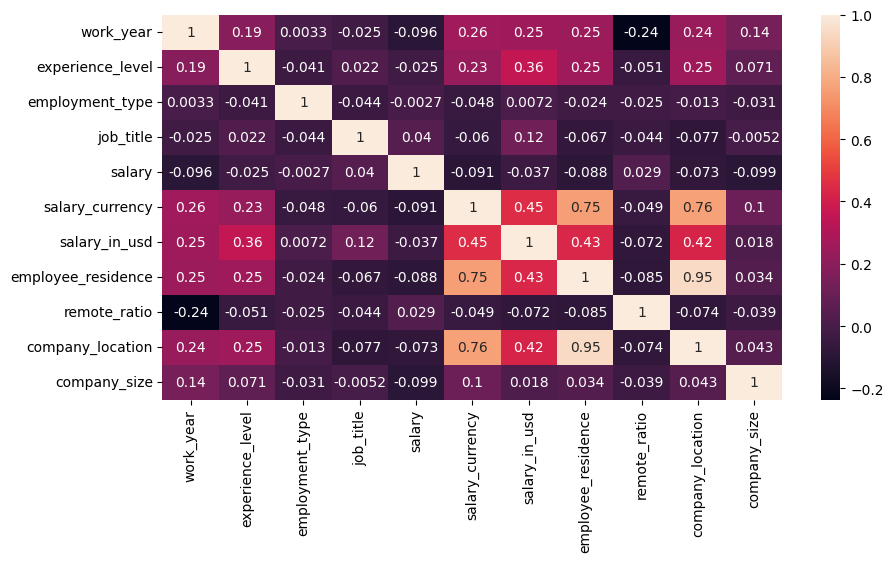

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df_copy.corr(), annot=True)

### **ทำการ train และเปรียบเทียบ algorithms**

In [ ]:
def regression_(x, y):
    lr = LinearRegression()
    rf = RandomForestRegressor()
    gb = GradientBoostingRegressor()
    dt = DecisionTreeRegressor()
    xgb = XGBRegressor()

    algos = [lr , rf , gb, dt ,xgb]
    algos_names = ["LinearRegression" ,"Random Forest" , 'GradientBoosting',
                   'DecisionTree','XGB']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

    r_score = []
    mse = []
    mae = []

    result = pd.DataFrame(columns=['R_square', 'MSE', 'MAE'], index = algos_names)

    for algo in algos:
        pred = algo.fit(x_train, y_train).predict(x_test)
        r_score.append(r2_score(y_test, pred))
        mse.append(mean_squared_error(y_test, pred) ** .5)
        mae.append(mean_absolute_error(y_test, pred))

    result.R_square = r_score
    result.MSE = mse
    result.MAE = mae

    return result.sort_values('R_square', ascending=False)

In [ ]:
scaler = MinMaxScaler()

df_copy = df_copy.drop(["salary"], axis=1)
y= df_copy['salary_in_usd']
X= df_copy.drop(['salary_in_usd'],axis=1)
X = scaler.fit_transform(df_copy.drop(['salary_in_usd'],axis=1))
y= y.values.reshape(-1,1)
y = np.log(y)

In [ ]:
regression_(X , y)

<ipython-input-229-5c11e386e5d7>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  pred = algo.fit(x_train, y_train).predict(x_test)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,R_square,MSE,MAE
GradientBoosting,0.582647,0.365658,0.275940
XGB,0.578813,0.367333,0.277423
Random Forest,0.576049,0.368536,0.272389
DecisionTree,0.420457,0.430889,0.305816
LinearRegression,0.366190,0.450611,0.326445


### **HyperParameter Optimization**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [ ]:
gbm_model=GradientBoostingRegressor()

In [ ]:
gbm_params = {
    'n_estimators': [100, 500],
    'subsample': [1,0.5],
    'max_depth' : [3,8],
    "learning_rate": [0.01,0.1]
}

In [ ]:
y = y.ravel()

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
gbm_best_grid = GridSearchCV(gbm_model,gbm_params, cv=5,n_jobs=-1, verbose=False).fit(X,y)

In [ ]:
final=gbm_model.set_params(**gbm_best_grid.best_params_,random_state=17).fit(X,y)

In [ ]:
final_test=final.predict(x_test)

In [ ]:
r2_score(y_test,final_test)

0.7516026870906207